# Entendendo e Aplicando o XGBoost

## 1. O que é Boosting?

Imagine que você tem uma tarefa complexa, como identificar se uma imagem contém um gato. Em vez de tentar criar um único modelo superinteligente que acerte sempre, a ideia do **Boosting** é construir uma equipe de modelos mais simples (chamados de "weak learners" ou aprendizes fracos).

Cada novo membro da equipe é treinado para corrigir os erros cometidos pelos membros anteriores. É como um grupo de estudo:
*   O primeiro aluno tenta resolver um problema.
*   O segundo aluno foca nas questões que o primeiro errou.
*   O terceiro foca nos erros combinados do primeiro e do segundo, e assim por diante.

No final, as opiniões de todos os membros da equipe são combinadas (geralmente por uma votação ponderada) para tomar a decisão final, resultando em um "strong learner" (aprendiz forte).

---

## 2. O que é Gradient Boosting?

O **Gradient Boosting** é uma técnica de Boosting sofisticada. Em vez de apenas focar nos exemplos que foram classificados incorretamente (como o AdaBoost faz), o Gradient Boosting tenta corrigir os *resíduos* do modelo anterior.

*   **Resíduo**: Para problemas de regressão, o resíduo é simplesmente a diferença entre o valor real e o valor previsto pelo modelo anterior (erro = real - previsto).
*   Cada novo modelo na sequência é treinado para prever esses resíduos.

Ao somar a previsão do modelo base com as previsões dos modelos de resíduos (geralmente com um pequeno "peso" chamado taxa de aprendizado), o modelo gradualmente se aproxima dos valores reais.

### A Mágica do "Gradiente": Uma Analogia ⛰️🚶‍♂️

Aqui entra a parte "Gradiente". Pense na função de perda (loss function) do seu modelo como uma paisagem montanhosa. Seu objetivo é encontrar o ponto mais baixo nesse vale (minimizar a perda).

*   **Função de Perda (Loss Function)**: Mede quão ruim é o seu modelo. Exemplos: Erro Quadrático Médio (MSE) para regressão, Log Loss para classificação.
*   **Gradiente**: Em matemática, o gradiente de uma função aponta na direção do maior aumento da função. Pense nele como a inclinação da montanha onde você está. Se você quer descer (minimizar a perda), você deve ir na direção oposta ao gradiente (o gradiente negativo).

**Analogia do Alpinista Cego e Preciso:**

Imagine um alpinista (nosso algoritmo) que está em uma montanha (a superfície da função de perda) e quer chegar ao ponto mais baixo (mínimo da perda), mas ele está vendado.

1.  **Primeiro Passo (Modelo Inicial)**: Ele dá um passo inicial em alguma direção (faz uma primeira previsão, talvez a média dos valores). Ele agora está em algum ponto da montanha.
2.  **Sentindo a Inclinação (Calculando o Gradiente)**: Para saber para onde ir, ele tateia o chão ao redor para sentir a inclinação (calcula o gradiente da função de perda em relação às previsões atuais). O gradiente diz a ele qual é a direção de subida mais íngreme.
3.  **Descendo a Montanha (Próximo Modelo Foca no Gradiente Negativo)**: O alpinista quer descer, então ele se move na direção oposta ao gradiente (gradiente negativo). No Gradient Boosting, cada novo "weak learner" (árvore de decisão, geralmente) é treinado para prever esses gradientes negativos (ou algo muito próximo a eles, chamados pseudo-resíduos).
    *   Para o Erro Quadrático Médio (MSE), o gradiente negativo é exatamente o resíduo (real - previsto). Isso torna a ideia de "treinar nos resíduos" muito intuitiva para regressão.
    *   Para outras funções de perda (como Log Loss na classificação), o gradiente negativo não é exatamente o resíduo, mas ainda representa a direção em que as previsões devem ser ajustadas para reduzir a perda mais rapidamente.
4.  **Pequenos Passos (Taxa de Aprendizado)**: O alpinista não dá um passo gigantesco na direção da descida, pois pode acabar passando do ponto mínimo e subindo do outro lado do vale. Ele dá pequenos passos (controlados pela "taxa de aprendizado" ou `learning_rate`).
5.  **Repetindo**: Ele repete os passos 2-4, a cada vez sentindo a nova inclinação e dando outro pequeno passo na direção da descida, até que ele esteja satisfeito por estar perto o suficiente do fundo do vale ou até que um número máximo de passos seja atingido.

Então, em essência, o "Gradiente" no Gradient Boosting refere-se ao uso do gradiente da função de perda para descobrir como cada novo modelo deve ajustar as previsões combinadas para se aproximar da solução ótima. Cada novo modelo tenta "empurrar" a previsão total na direção que mais reduz o erro.

---

## 3. XGBoost: O "Extreme" Gradient Boosting

XGBoost (Extreme Gradient Boosting) é uma implementação otimizada e altamente eficiente do algoritmo Gradient Boosting. Ele se tornou extremamente popular em competições de Machine Learning (como Kaggle) e em aplicações industriais devido à sua performance e velocidade.

**Por que XGBoost? Vantagens:**

1.  **Regularização**: XGBoost inclui regularização L1 (Lasso) e L2 (Ridge) para prevenir overfitting, o que o torna mais robusto que o Gradient Boosting tradicional.
2.  **Tratamento de Dados Faltantes (Missing Values)**: XGBoost pode lidar nativamente com dados faltantes. Durante o treinamento, ele aprende qual o melhor caminho a seguir na árvore quando um valor está faltando.
3.  **Paralelização e Processamento Distribuído**: XGBoost é projetado para ser eficiente, permitindo o uso de múltiplos cores do processador e até mesmo rodar em clusters distribuídos.
4.  **Poda de Árvores (Tree Pruning)**: Ele usa uma abordagem mais "profunda" de poda (max\_depth) e também pode parar de dividir um nó com base na melhoria do ganho (gamma) ou no número mínimo de amostras por folha (min\_child\_weight), tornando as árvores mais eficientes.
5.  **Validação Cruzada Embutida**: XGBoost pode realizar validação cruzada em cada iteração do processo de boosting.
6.  **Early Stopping**: Pode parar o treinamento automaticamente se o desempenho em um conjunto de validação não melhorar após um certo número de rodadas, economizando tempo e evitando overfitting.
7.  **Flexibilidade**: Altamente customizável com diversos hiperparâmetros para otimização.

---

## 4. Quando Utilizar o XGBoost?

*   **Dados Estruturados/Tabulares**: XGBoost brilha com dados em formato de tabela (como os que você encontraria em planilhas ou bancos de dados).
*   **Alta Performance Preditiva Necessária**: Quando o objetivo principal é obter a maior acurácia ou melhor métrica possível.
*   **Problemas Complexos**: Onde as relações entre as features e o alvo não são lineares e podem ser intrincadas.
*   **Competições de Machine Learning**: É uma escolha frequente e vencedora.
*   **Quando o tempo de treinamento não é a restrição mais crítica** (embora seja rápido, modelos mais simples podem ser mais rápidos para datasets muito pequenos ou quando uma solução "boa o suficiente" é aceitável rapidamente).

Não é a melhor escolha para:
*   Problemas de Visão Computacional ou Processamento de Linguagem Natural muito complexos (onde Deep Learning geralmente domina, embora XGBoost possa ser usado sobre features extraídas por modelos de DL).
*   Interpretabilidade extrema (modelos lineares ou árvores de decisão únicas são mais fáceis de interpretar).

---

## 5. Pré-processamento de Dados para XGBoost

XGBoost é relativamente robusto, mas algumas etapas de pré-processamento podem melhorar seu desempenho ou são necessárias:

1.  **Tratamento de Dados Categóricos**:
    *   XGBoost requer que todas as entradas sejam numéricas.
    *   **One-Hot Encoding**: É a abordagem mais comum e geralmente recomendada para variáveis categóricas nominais (sem ordem intrínseca). Cria novas colunas binárias para cada categoria.
    *   **Label Encoding**: Converte categorias em números (0, 1, 2...). Pode ser usado, mas introduz uma ordem artificial que pode não ser ideal se não existir na realidade. Funciona bem para variáveis ordinais.

2.  **Dados Numéricos**:
    *   **Escalonamento (Scaling)**: Diferentemente de algoritmos baseados em distância (como KNN ou SVM), árvores de decisão (e ensembles de árvores como XGBoost) não são sensíveis à escala das features. Portanto, escalonar (StandardScaler, MinMaxScaler) geralmente não é estritamente necessário e, na maioria das vezes, não melhora significativamente o desempenho do XGBoost. Pode até, em raras ocasiões, piorar um pouco. No entanto, não costuma prejudicar.

3.  **Dados Faltantes (Missing Values)**:
    *   Como mencionado, XGBoost pode lidar com `NaN` internamente. Ele aprende a melhor direção para dados faltantes durante o treinamento.
    *   No entanto, se você tiver um bom conhecimento do domínio e uma estratégia de imputação que faça sentido para o seu problema (ex: média, mediana, valor constante, modelo preditivo para imputar), pode ser benéfico aplicá-la. Testar ambas as abordagens (com e sem imputação explícita) é uma boa prática.

4.  **Feature Engineering**:
    *   Criar novas features a partir das existentes pode ser muito poderoso. XGBoost é bom em encontrar interações, mas features bem pensadas podem ajudar.

**Em resumo:** A principal etapa obrigatória é converter features categóricas em numéricas. O tratamento de dados faltantes é opcional (XGBoost lida bem), e o escalonamento de features numéricas geralmente não é necessário.



In [1]:
# Importações básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pré-processamento e modelagem
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# XGBoost
import xgboost as xgb

print("XGBoost version:", xgb.__version__)

# Configurações para plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

XGBoost version: 2.1.4


## 6. Prática: XGBoost para Classificação 🎯

Vamos usar o dataset "Breast Cancer Wisconsin" para um problema de classificação binária: prever se um tumor é maligno (M) ou benigno (B).






In [2]:
from sklearn.datasets import load_breast_cancer
data_cancer = load_breast_cancer()
X_cancer = pd.DataFrame(data_cancer.data, columns=data_cancer.feature_names)
y_cancer = pd.Series(data_cancer.target).map({0: 'Benigno', 1: 'Maligno'})

In [3]:
print("Dimenções de X_cancer", X_cancer.shape)
print("Primeiras 5 linhas de X_cancer:")
print(X_cancer.head())
print("\nPrimeiras 5 linhas de y_cancer (maligno/benigno):")
print(y_cancer.value_counts())

Dimenções de X_cancer (569, 30)
Primeiras 5 linhas de X_cancer:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  .

In [4]:
X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(
    X_cancer, y_cancer, test_size=0.25, random_state=42
)

print("Formato dos dados de treino:", X_train_housing.shape, y_train_housing.shape)
print("Formato dos dados de teste:", X_test_housing.shape, y_test_housing.shape)

Formato dos dados de treino: (426, 30) (426,)
Formato dos dados de teste: (143, 30) (143,)


In [5]:
y_cancer[:5]

,0
0,Benigno
1,Benigno
2,Benigno
3,Benigno
4,Benigno


In [6]:
label_encoder_target = LabelEncoder()
y_cancer_encoded = label_encoder_target.fit_transform(y_cancer)
y_cancer_encoded[:5]

array([0, 0, 0, 0, 0])

In [7]:
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(
    X_cancer, y_cancer_encoded, test_size=0.25, random_state=42
)

### Treinando um Modelo XGBoost Básico (Classificação)

Para problemas de classificação, usamos `xgb.XGBClassifier`.
Como todas as features já são numéricas neste dataset, não precisamos de One-Hot Encoding. E, como discutido, escalonamento não é estritamente necessário para XGBoost.

In [8]:
xgb_clf_basic = xgb.XGBClassifier(objectiv='binary:logistic', use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf_basic.fit(X_train_cancer, y_train_cancer)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:42:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "objectiv", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objectiv='binary:logistic', ...)

### Avaliando o Modelo (Classificação)

In [9]:
accuracy_basic = accuracy_score(y_test_cancer, xgb_clf_basic.predict(X_test_cancer))
print(f"Acurácia do Modelo Básico: {accuracy_basic:.4f}")

Acurácia do Modelo Básico: 0.9580


Relatório completo de classificação
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        54
           1       0.97      0.97      0.97        89

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



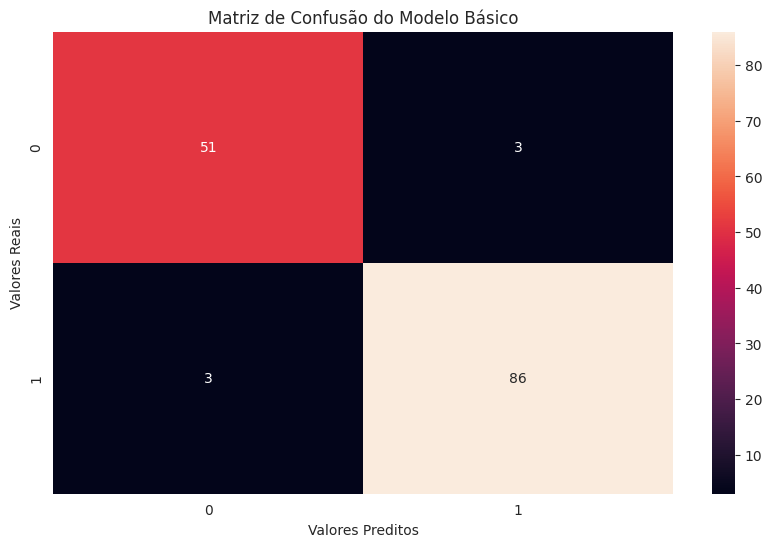

In [10]:
print("Relatório completo de classificação")
print(classification_report(y_test_cancer, xgb_clf_basic.predict(X_test_cancer)))
sns.heatmap(confusion_matrix(y_test_cancer, xgb_clf_basic.predict(X_test_cancer)), annot=True, fmt='d')
plt.title('Matriz de Confusão do Modelo Básico')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.show()

### Otimizando Hiperparâmetros com `GridSearchCV` (Classificação)

XGBoost tem muitos hiperparâmetros. `GridSearchCV` nos ajuda a encontrar uma boa combinação.

Principais Hiperparâmetros do XGBoost:
*   `n_estimators`: Número de árvores (rodadas de boosting).
*   `learning_rate` (ou `eta`): Taxa de aprendizado. Reduz a contribuição de cada árvore. Valores menores geralmente requerem mais `n_estimators`.
*   `max_depth`: Profundidade máxima de cada árvore. Controla a complexidade do modelo.
*   `subsample`: Fração de amostras usadas para treinar cada árvore. Ajuda a prevenir overfitting.
*   `colsample_bytree`: Fração de features usadas para treinar cada árvore. Ajuda a prevenir overfitting.
*   `gamma`: Ganho mínimo para realizar uma divisão.
*   `reg_alpha` (L1) e `reg_lambda` (L2): Termos de regularização.

In [11]:
param_grid_clf = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
}

In [12]:
cv_stratified = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [13]:
grid_search_clf = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid = param_grid_clf,
    scoring='accuracy',
    n_jobs=-1, # use all cores
    cv=cv_stratified,
    verbose=1
)

In [15]:
grid_search_clf.fit(X_train_cancer, y_train_cancer)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:46:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importanc...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 150],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='accuracy', verbose=1)

In [16]:
#melhores hiperparametros
print("Melhores hiperparâmetros encontrados:")
print(grid_search_clf.best_params_)

Melhores hiperparâmetros encontrados:
{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.7}


In [17]:
best_xgb_clf = grid_search_clf.best_estimator_

Acurácia do Modelo Otimizado: 0.9580
Relatório completo de classificação
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        54
           1       0.97      0.97      0.97        89

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



<Axes: >

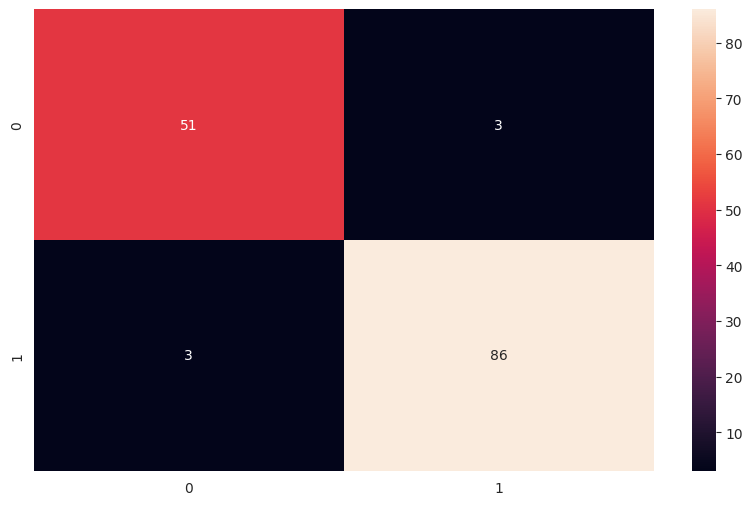

In [18]:
accuracy_tuned = accuracy_score(y_test_cancer, best_xgb_clf.predict(X_test_cancer))
print(f"Acurácia do Modelo Otimizado: {accuracy_tuned:.4f}")

print("Relatório completo de classificação")
print(classification_report(y_test_cancer, best_xgb_clf.predict(X_test_cancer)))

sns.heatmap(confusion_matrix(y_test_cancer, best_xgb_clf.predict(X_test_cancer)), annot=True, fmt='d')

In [19]:
# Diferença de acurácia do modelo básico para o modelo com otimização de parametros
print(f"Diferença de acurácia: {accuracy_tuned - accuracy_basic:.4f}")
print(f"Acurácia do Modelo Básico: {accuracy_basic:.4f}")
print(f"Acurácia do Modelo Otimizado: {accuracy_tuned:.4f}")

Diferença de acurácia: 0.0000
Acurácia do Modelo Básico: 0.9580
Acurácia do Modelo Otimizado: 0.9580


**Interpretação (Classificação):**
Com o `GridSearchCV`, buscamos uma combinação de hiperparâmetros que maximize uma métrica de interesse (no nosso caso, `roc_auc`) na validação cruzada. O modelo resultante (`best_xgb_clf`) geralmente tem um desempenho melhor ou mais generalizável no conjunto de teste.

---

# 27/05/2025

## 7. Prática: XGBoost para Regressão 🏡

Agora, vamos usar o XGBoost para um problema de regressão. Usaremos o dataset ``California Housing Prices``. **O objetivo** é prever o preço mediano das casas.


In [20]:
# Carregando os dados de exemplo (California Housing)
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
X_housing = pd.DataFrame(housing.data, columns=housing.feature_names)
y_housing = pd.Series(housing.target)

print("Dimensões de X_housing:", X_housing.shape)
print("Primeiras 5 linhas de X_housing:")
print(X_housing.head())
print("\nPrimeiras 5 linhas de y_housing (preço mediano em $100,000s):")
print(y_housing.head())

Dimensões de X_housing: (20640, 8)
Primeiras 5 linhas de X_housing:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

Primeiras 5 linhas de y_housing (preço mediano em $100,000s):
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
dtype: float64


In [21]:
X_train_housing, X_test_housing, y_train_housing, y_test_housing = train_test_split(
    X_housing, y_housing, test_size=0.25, random_state=42
)

print("Formato dos dados de treino:", X_train_housing.shape, y_train_housing.shape)
print("Formato dos dados de teste:", X_test_housing.shape, y_test_housing.shape)

Formato dos dados de treino: (15480, 8) (15480,)
Formato dos dados de teste: (5160, 8) (5160,)


### Treinando um Modelo XGBoost Básico (Regressão)

Para problemas de regressão, usamos `xgb.XGBRegressor`.

In [22]:
xgb_reg_basic = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_reg_basic.fit(X_train_housing, y_train_housing)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

### Avaliando o Modelo (Regressão)

Métricas comuns para regressão:
*   **Mean Squared Error (MSE)**: Média dos erros ao quadrado. Penaliza erros grandes.
*   **Root Mean Squared Error (RMSE)**: Raiz quadrada do MSE. Está na mesma unidade da variável alvo.
*   **Mean Absolute Error (MAE)**: Média dos erros absolutos. Mais robusto a outliers.
*   **R-squared (R²)**: Coeficiente de determinação. Proporção da variância na variável dependente que é previsível a partir das variáveis independentes. Varia de -∞ a 1 (melhor).

--- Métricas do XGBRegressor Básico ---
Mean Squared Error (MSE): 0.2161
Root Mean Squared Error (RMSE): 0.4649
Mean Absolute Error (MAE): 0.3054
R-squared (R²): 0.8367


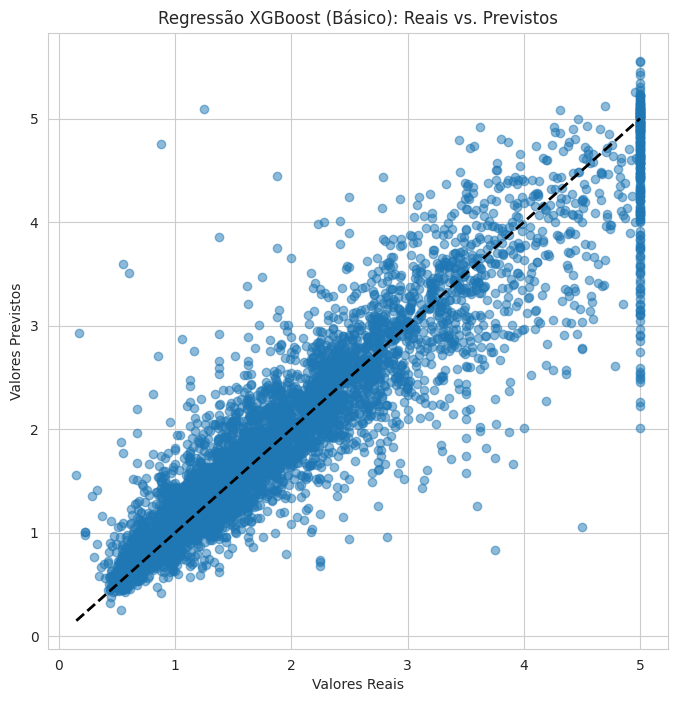

In [23]:
# Fazer previsões no conjunto de teste
y_pred_housing_basic = xgb_reg_basic.predict(X_test_housing)

# Avaliar
mse_basic = mean_squared_error(y_test_housing, y_pred_housing_basic)
rmse_basic = np.sqrt(mse_basic)
mae_basic = mean_absolute_error(y_test_housing, y_pred_housing_basic)
r2_basic = r2_score(y_test_housing, y_pred_housing_basic)

print("--- Métricas do XGBRegressor Básico ---")
print(f"Mean Squared Error (MSE): {mse_basic:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_basic:.4f}")
print(f"Mean Absolute Error (MAE): {mae_basic:.4f}")
print(f"R-squared (R²): {r2_basic:.4f}")

# Plot de Previsto vs Real
plt.figure(figsize=(8, 8))
plt.scatter(y_test_housing, y_pred_housing_basic, alpha=0.5)
plt.plot([y_test_housing.min(), y_test_housing.max()], [y_test_housing.min(), y_test_housing.max()], 'k--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Regressão XGBoost (Básico): Reais vs. Previstos')
plt.show()

### Otimizando Hiperparâmetros com `GridSearchCV` (Regressão)

In [24]:
param_grid_reg = {
    'n_estimators': [100, 300],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3,5],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
}

In [25]:
grid_search_reg = GridSearchCV(
    estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42), param_grid = param_grid_reg, scoring = 'neg_mean_squared_error', cv = 3, verbose=1, n_jobs = -1)

In [26]:
grid_search_reg.fit(X_train_housing, y_train_housing)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1],
                         'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 300], 'subsample': [0.8, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [27]:
best_xgb_reg = grid_search_reg.best_estimator_
best_xgb_reg

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)


--- Métricas do XGBRegressor Otimizado ---
Mean Squared Error (MSE): 0.2058
Root Mean Squared Error (RMSE): 0.4536
Mean Absolute Error (MAE): 0.3000
R-squared (R²): 0.8445

--- Melhorias ---
Redução no RMSE: 0.0113 (Quanto menor, melhor)
Aumento no R²: 0.0078 (Quanto maior, melhor)


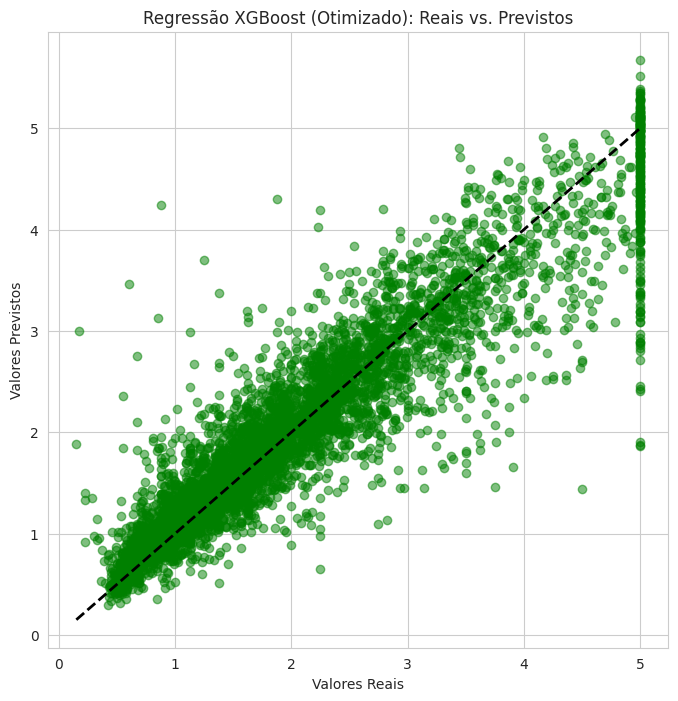

In [28]:
# Avaliar o melhor modelo encontrado pelo GridSearchCV
y_pred_housing_tuned = best_xgb_reg.predict(X_test_housing)

# Avaliar
mse_tuned = mean_squared_error(y_test_housing, y_pred_housing_tuned)
rmse_tuned = np.sqrt(mse_tuned)
mae_tuned = mean_absolute_error(y_test_housing, y_pred_housing_tuned)
r2_tuned = r2_score(y_test_housing, y_pred_housing_tuned)

print("\n--- Métricas do XGBRegressor Otimizado ---")
print(f"Mean Squared Error (MSE): {mse_tuned:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tuned:.4f}")
print(f"Mean Absolute Error (MAE): {mae_tuned:.4f}")
print(f"R-squared (R²): {r2_tuned:.4f}")

# Comparar com o básico
print("\n--- Melhorias ---")
print(f"Redução no RMSE: {rmse_basic - rmse_tuned:.4f} (Quanto menor, melhor)")
print(f"Aumento no R²: {r2_tuned - r2_basic:.4f} (Quanto maior, melhor)")


# Plot de Previsto vs Real para o modelo otimizado
plt.figure(figsize=(8, 8))
plt.scatter(y_test_housing, y_pred_housing_tuned, alpha=0.5, color='green')
plt.plot([y_test_housing.min(), y_test_housing.max()], [y_test_housing.min(), y_test_housing.max()], 'k--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Regressão XGBoost (Otimizado): Reais vs. Previstos')
plt.show()

**Interpretação (Regressão):**
Similar à classificação, o `GridSearchCV` ajuda a encontrar hiperparâmetros que minimizam o erro (neste caso, o MSE negativo é maximizado, o que equivale a minimizar o MSE) na validação cruzada. O modelo otimizado geralmente apresenta métricas de erro menores (MSE, RMSE, MAE) e um R² mais alto no conjunto de teste.

---






## 8. Conclusão

*   **Gradient Boosting** é uma técnica poderosa que constrói modelos sequencialmente, onde cada novo modelo corrige os erros (ou mais precisamente, os gradientes negativos da função de perda) do anterior.
*   A analogia do **alpinista cego** ajuda a entender como o "gradiente" guia o algoritmo para minimizar a função de perda.
*   **XGBoost** é uma implementação otimizada do Gradient Boosting, oferecendo alta performance, regularização, e bom tratamento de dados.
*   É essencial para XGBoost que **features categóricas sejam convertidas para formato numérico**. Escalonamento de features numéricas é geralmente opcional.
*   A otimização de hiperparâmetros com ferramentas como `GridSearchCV` é fundamental para extrair o máximo desempenho do XGBoost.
*   XGBoost é versátil, aplicável tanto a problemas de **classificação** (`XGBClassifier`) quanto de **regressão** (`XGBRegressor`).

---

## 9. Exercícios Propostos

1.  **Explorando Outros Hiperparâmetros (Classificação):**
    *   No problema de classificação do câncer de mama, adicione os hiperparâmetros `gamma` e `reg_alpha` (regularização L1) ao `param_grid_clf` do `GridSearchCV`.
    *   Quais são os melhores valores encontrados para esses novos parâmetros?
    *   Houve melhora significativa no desempenho do modelo no conjunto de teste em comparação com o modelo otimizado anteriormente?
    *   **Dica**: `gamma` pode variar de 0 a valores maiores (ex: 0, 0.1, 0.5, 1). `reg_alpha` também (ex: 0, 0.01, 0.1, 1).

2.  **XGBoost com Pré-processamento de Categóricas (Novo Dataset - Titanic):**
    *   Utilize o dataset "Titanic" (clássico para classificação). Você pode carregá-lo facilmente com `sns.load_dataset('titanic')`.
    *   O objetivo é prever a coluna `survived`.
    *   **Desafios:**
        *   Identifique as colunas numéricas e categóricas.
        *   Trate os valores faltantes (ex: imputar idade com a mediana, `embarked` com a moda).
        *   Aplique One-Hot Encoding nas features categóricas relevantes (ex: `sex`, `embarked`, `pclass` se tratada como categórica). Use `ColumnTransformer` e `Pipeline` para organizar o pré-processamento.
        *   Divida os dados em treino e teste.
        *   Treine um `XGBClassifier` e avalie seu desempenho.
        *   (Bônus) Tente otimizar os hiperparâmetros com `GridSearchCV`.
    *   Como o XGBoost se saiu neste dataset com mais pré-processamento envolvido?